In [106]:
import pandas as pd
import numpy as np
import math 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
subscriptions = pd.read_csv('C:/Users/jiaqi/Downloads/subscriptionsdataFINAL.csv')
#Converting to datetime
subscriptions['Join Date'] =  pd.to_datetime(subscriptions['Join Date'].str.upper(), format='%b-%y', yearfirst=False)
subscriptions['End Date'] =  pd.to_datetime(subscriptions['End Date'].str.upper(), format='%b-%y', yearfirst=False)
subscriptions

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992
1,Greenwich,2018-06-01,A,Female,Standard,NaT,2,1972
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982
...,...,...,...,...,...,...,...,...
850028,Lewisham,2018-12-01,A,Male,Standard,NaT,850029,1995
850029,Tower Hamlets,2013-10-01,B,Male,Standard,2014-02-01,850030,1987
850030,Redbridge,2018-05-01,C1,Female,Standard,2018-09-01,850031,1985
850031,Camden,2017-07-01,B,Female,Standard,2017-09-01,850032,1978


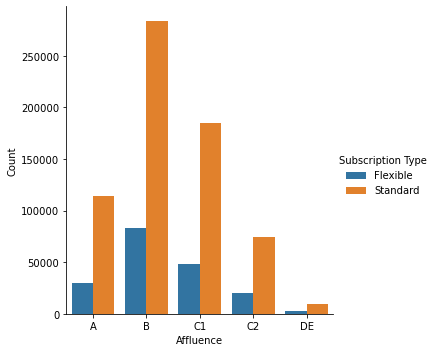

In [108]:
# Graph 1: Overview of customer segments

#affluence segment overview
affluence=subscriptions.groupby(['Affluence','Subscription Type']).size().to_frame('Count').reset_index()
affluence
sns.catplot(x="Affluence", y="Count", hue="Subscription Type", kind="bar", data=affluence)
plt.show()

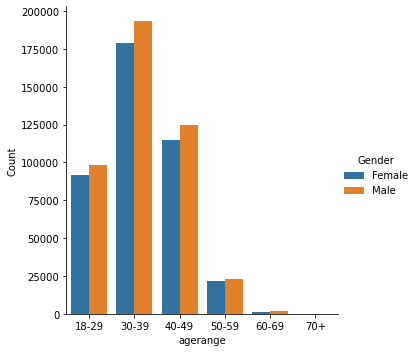

In [109]:
#Age segment Overview

#Calculating Age
today = datetime.today()
subscriptions['BirthYear'] =  pd.to_datetime(subscriptions['BirthYear'], format='%Y', yearfirst=False)
subscriptions['age'] = subscriptions['BirthYear'].apply(lambda x: (today - x).days // 365)

#Calculating Age-range
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
subscriptions['agerange'] = pd.cut(subscriptions.age, bins, labels = labels,include_lowest = True)
age=subscriptions.groupby(['agerange','Gender']).size().to_frame('Count').reset_index()

# Graph 2: Overview plot
sns.catplot(x="agerange", y="Count", hue="Gender", kind="bar", data=age)
plt.show()

In [120]:
date_min = min (subscriptions['Join Date'].min(),subscriptions['End Date'].min() )
date_max = max (subscriptions['Join Date'].max(),subscriptions['End Date'].max() )
dates = pd.date_range(date_min, date_max, freq = 'MS')
customers_total = pd.DataFrame({'Date':dates})
customers_total.head(), customers_total.shape
subscriptions['Duration'] = np.where(subscriptions['End Date'].isna(), 
                                     (date_max - subscriptions['Join Date']), 
                                     (subscriptions['End Date'] - subscriptions['Join Date']) )
subscriptions['Duration'] = (subscriptions['Duration'] /  np.timedelta64(1, 'M') ).apply(math.floor)
subscriptions.head()

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,age,agerange,Duration
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992-01-01,29,18-29,0
1,Greenwich,2018-06-01,A,Female,Standard,NaT,2,1972-01-01,49,40-49,6
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985-01-01,36,30-39,7
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972-01-01,49,40-49,2
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982-01-01,39,30-39,7


In [111]:
#Number of Cancellations vs time
end=subscriptions.groupby(['End Date']).size().to_frame('Count').reset_index()
end

,End Date,Count
0,2009-05-01,48
1,2009-06-01,56
2,2009-07-01,275
3,2009-08-01,355
4,2009-09-01,642
...,...,...
111,2018-08-01,12488
112,2018-09-01,12418
113,2018-10-01,12369
114,2018-11-01,12336


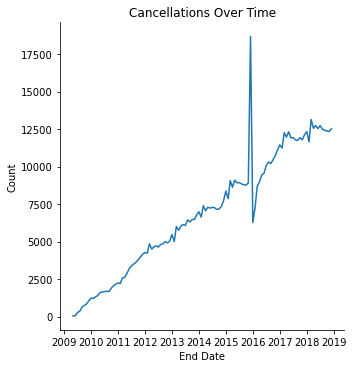

In [128]:
#Cancellations vs Time Graph
#Graph 3
ax=sns.relplot(x="End Date", y="Count", kind="line", data=end)
plt.title('Cancellations Over Time')
plt.show()

In [135]:
#Changes in number of gyms
include = subscriptions[subscriptions['Join Date'].dt.year == 2015]
include.groupby(['Club']).size().to_frame('Count').reset_index()

,Club,Count
0,Barnet,4754
1,Bexley,2787
2,Brent,5364
3,Camden,4541
4,Croydon,5038
5,Ealing,4768
6,Enfield,3922
7,Greenwich,4913
8,Hackney,693
9,Haringey,4426


In [114]:
#Visitation data part 2
df2 = pd.read_csv('C:/Users/jiaqi/Downloads/visitationdataPART2.csv')
df2.head()

,CustomerID,visitdate,TimeofVisit,peakvisits
0,270665,16/08/2015,19:15,True
1,51641,16/08/2015,19:15,True
2,443825,16/08/2015,19:15,True
3,792203,16/08/2015,19:15,True
4,191880,16/08/2015,19:15,True


In [115]:
#Visitation data part 1
df1 = pd.read_csv('C:/Users/jiaqi/Downloads/visitationdataPART1.csv')
df1.head()

,CustomerID,visitdate,TimeofVisit,peakvisits
0,126444,01/05/2009,05:45,False
1,456610,01/05/2009,05:45,False
2,293763,01/05/2009,06:00,False
3,151253,01/05/2009,06:15,False
4,476569,01/05/2009,06:15,False


In [116]:
#Joining visitation files
visitdf = pd.concat([df1, df2], axis=0, join='inner')
#Changing vsitdate to datetime
visitdf['visitdate'] =  pd.to_datetime(visitdf['visitdate'].str.upper(), format='%d/%m/%Y', yearfirst=False)
visitdf

,CustomerID,visitdate,TimeofVisit,peakvisits
0,126444,2009-05-01,05:45,False
1,456610,2009-05-01,05:45,False
2,293763,2009-05-01,06:00,False
3,151253,2009-05-01,06:15,False
4,476569,2009-05-01,06:15,False
...,...,...,...,...
1048570,443779,2015-09-27,08:45,True
1048571,114663,2015-09-27,08:45,True
1048572,290981,2015-09-27,08:45,True
1048573,20102,2015-09-27,08:45,True


In [117]:
#Merging all data into one dataframe
df4=pd.merge( left= subscriptions, right= visitdf, left_on='CustomerID', right_on='CustomerID')
df4

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,age,agerange,Duration,visitdate,TimeofVisit,peakvisits
0,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982-01-01,39,30-39,7,2015-08-19,17:00,False
1,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982-01-01,39,30-39,7,2015-08-22,08:15,True
2,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982-01-01,39,30-39,7,2015-08-30,18:15,True
3,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982-01-01,39,30-39,7,2015-08-31,08:45,True
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982-01-01,39,30-39,7,2015-09-02,07:45,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994-01-01,27,18-29,20,2015-09-16,20:30,False
2097146,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994-01-01,27,18-29,20,2015-09-17,19:45,True
2097147,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994-01-01,27,18-29,20,2015-09-18,08:30,True
2097148,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994-01-01,27,18-29,20,2015-09-19,11:45,False


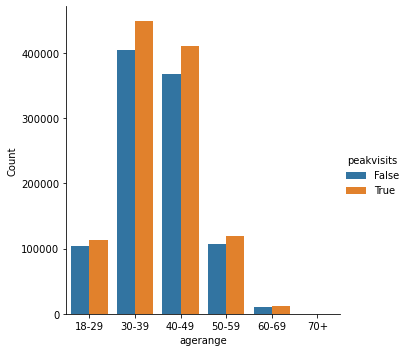

In [124]:
# Visits vs age
dff=df4.groupby(['agerange','peakvisits']).size().to_frame('Count').reset_index()
sns.catplot(x="agerange", y="Count", hue="peakvisits", kind="bar", data=dff)
plt.show()